# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [4]:
df = pd.read_csv("bank-additional-full (1).csv", sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

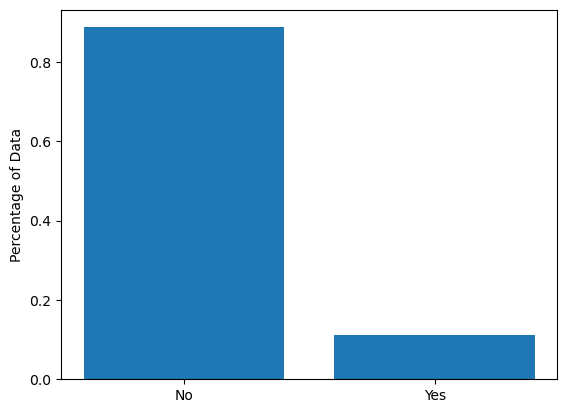

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()

over_x,over_y=ros.fit_resample(X_train,y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 1.025\ngini = 0.2\nsamples = 28831\nvalue = [25580, 3251]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.197\ngini = 0.134\nsamples = 25702\nvalue = [23841, 1861]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.063\nsamples = 16326\nvalue = [15795, 531]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.055\nsamples = 16102\nvalue = [15644, 458]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.439\nsamples = 224\nvalue = [151, 73]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 3.6\ngini = 0.243\nsamples = 9376\nvalue = [8046, 1330]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.227\nsamples = 9175\nvalue = [7980, 1195]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.441\nsamples = 201\nvalue = [66, 135]\nclass = Yes'),
 Text(0.75, 0.625, 'duration <= 2.22\ngini = 0.494\nsamples = 3129\nvalue = [1739, 1390]\nclass = No'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.466\nsamples = 2028\nvalue = [1279, 749]\nclass = No'),
 Text(0.562

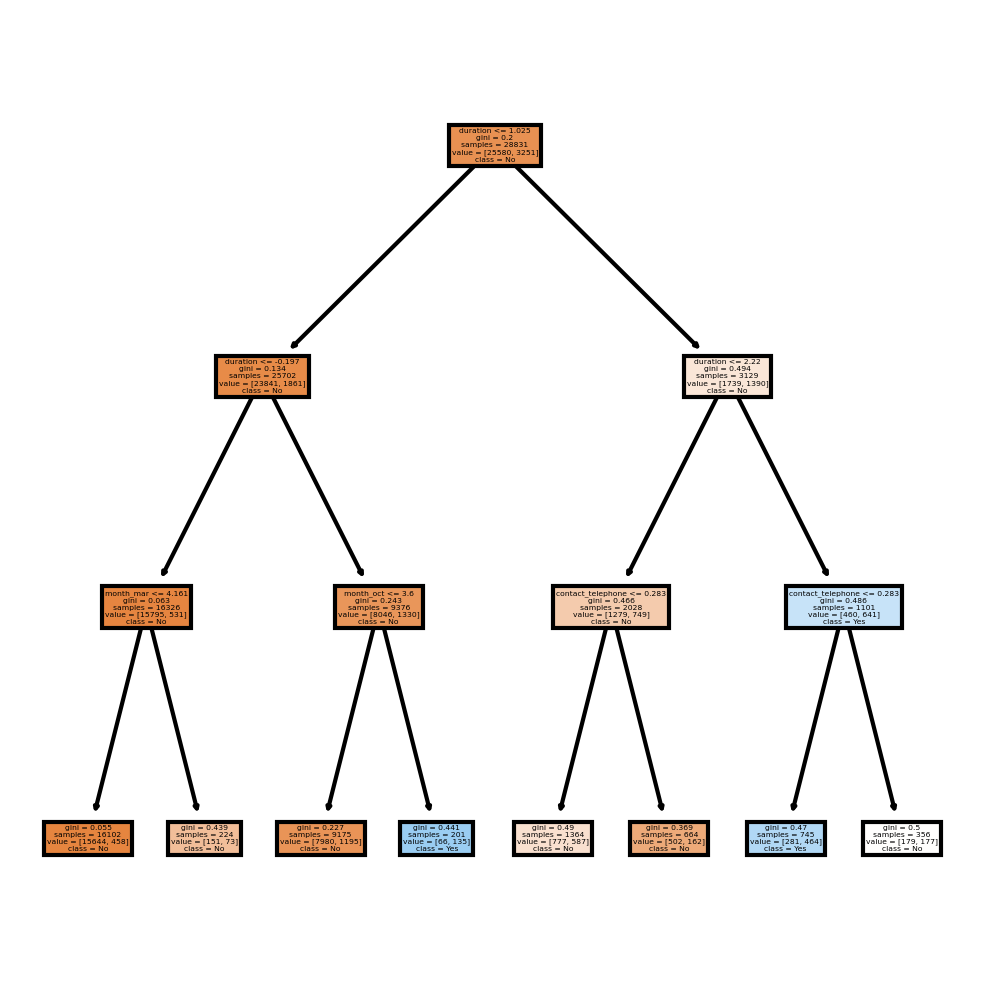

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

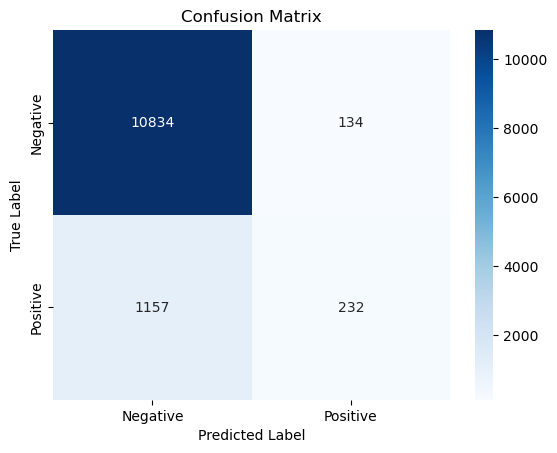

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [16]:
# placeholder for optimizing max depth
dtree=DecisionTreeClassifier(max_depth=3)

In [17]:
bagging=BaggingClassifier(estimator=dtree,
                   n_estimators=100, 
                   max_samples=.5, 
                   max_features =1.)

In [18]:
bagging.fit(over_x, over_y)

y_pred=bagging.predict(X_test)

/opt/conda/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [19]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

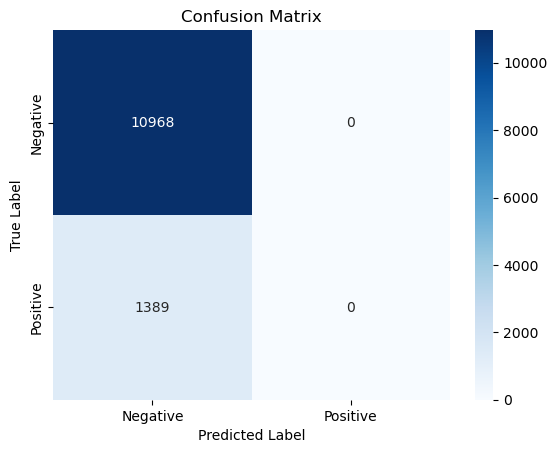

In [20]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
# placeholder for optimizing max depth
dtree=DecisionTreeClassifier(max_depth=3)


In [23]:
boost=AdaBoostClassifier(estimator=dtree,
                   n_estimators=100, 
                    learning_rate=.1)


# max_features =1.

In [24]:
boost.fit(over_x, over_y)

y_pred=boost.predict(X_test)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


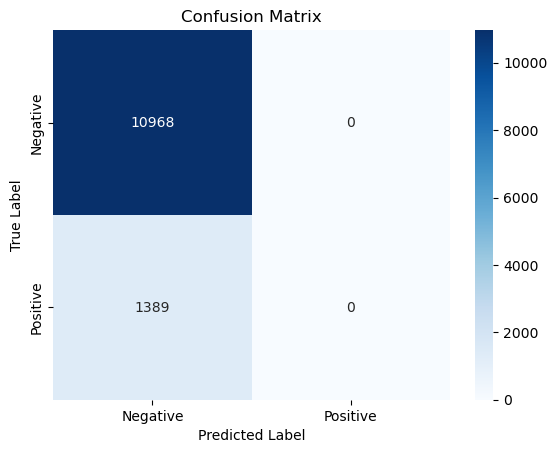

In [25]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Train a Logistic regression superlearner.

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
base_predictions=[list(dtree_main.predict(X_train)), 
                  list(boost.predict(X_train)), 
                  list(bagging.predict(X_train))]

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [28]:
base_predictions=np.array(base_predictions).transpose()

In [29]:
super_learner=LogisticRegression()

In [30]:
super_learner.fit(base_predictions,y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
super_learner.coef_

array([[0.25752485, 3.13369995, 0.35633768]])

# 6.)